In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")
etfs = yf.download(["VOO", "VB", "VEA", "VWO", "VNQ", "DBC", "TLT", "TIP", "JNK"], start = "2024-01-01", end = "2024-12-19")
etfs.to_csv("etfs.csv")

[*********************100%***********************]  9 of 9 completed


<Axes: xlabel='Date'>

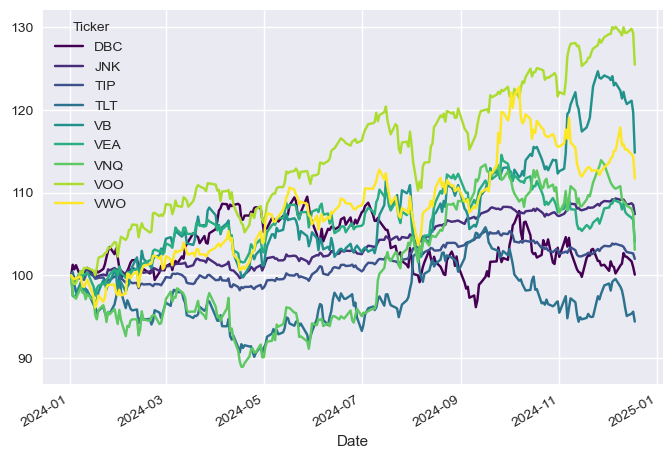

In [2]:
etfs = pd.read_csv("etfs.csv", header=[0, 1], index_col=[0], parse_dates=[0])
adj_close = etfs['Adj Close']
norm = adj_close.div(adj_close.iloc[0]).mul(100)
norm.plot(cmap = "viridis")

<Axes: xlabel='Date'>

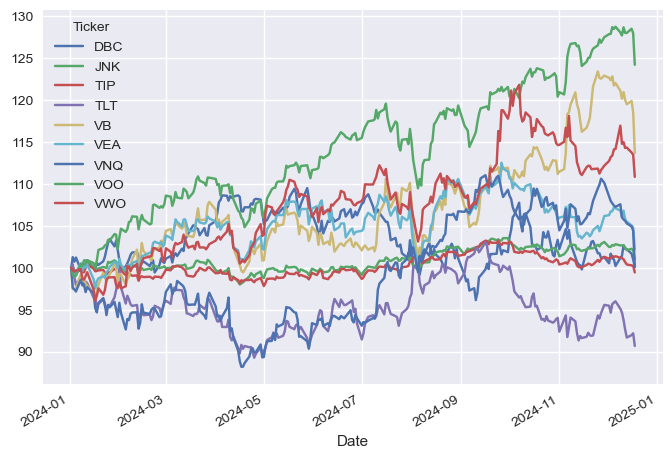

In [3]:
etfs.to_csv("etfs.csv")
etfs = pd.read_csv("etfs.csv", header=[0, 1], index_col=[0], parse_dates=[0])
close = etfs['Close']
norm = close.div(close.iloc[0]).mul(100)
norm.plot()

Text(0, 0.5, 'Annualized Return (Mean)')

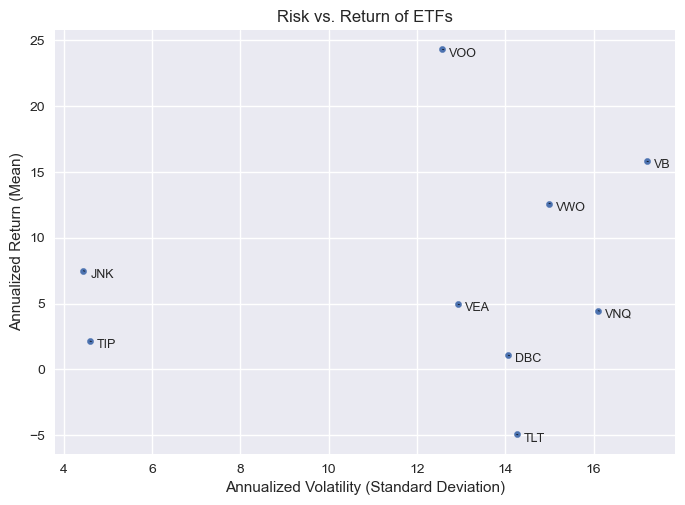

In [4]:
ret = adj_close.pct_change().dropna().mul(100)
summary = ret.describe().T.loc[:,["mean","std"]]
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary.plot.scatter(x = "std", y = "mean")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"], summary.loc[i, "mean"]),
                 xytext=(5, -5),  # Adjust position slightly
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', lw=0.5),  # Optionally, add arrows
                 fontsize=9)
plt.title('Risk vs. Return of ETFs')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return (Mean)')

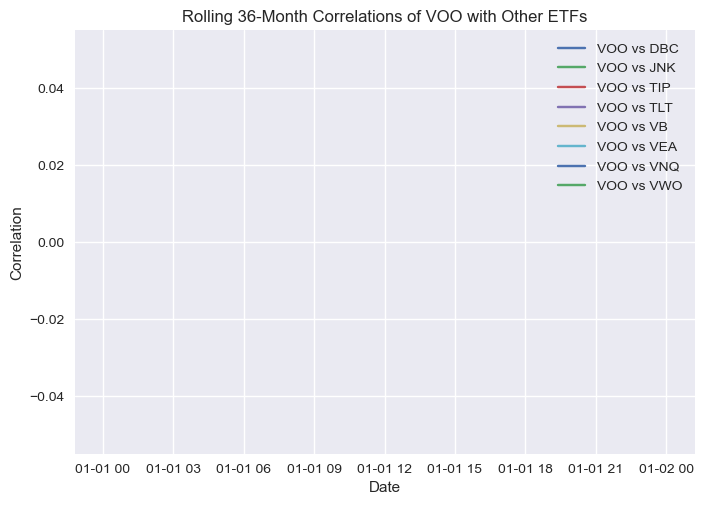

In [5]:
month_ret = adj_close.resample("ME").last().pct_change().dropna().mul(100)
etfs_to_compare = [ticker for ticker in adj_close.columns if ticker != 'VOO']
for ticker in etfs_to_compare:
    correlation_series = month_ret.VOO.rolling(36).corr(month_ret[ticker])
    plt.plot(correlation_series, label=f'VOO vs {ticker}')

# Add title and axis labels
plt.title('Rolling 36-Month Correlations of VOO with Other ETFs')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()

<Axes: xlabel='Ticker', ylabel='Ticker'>

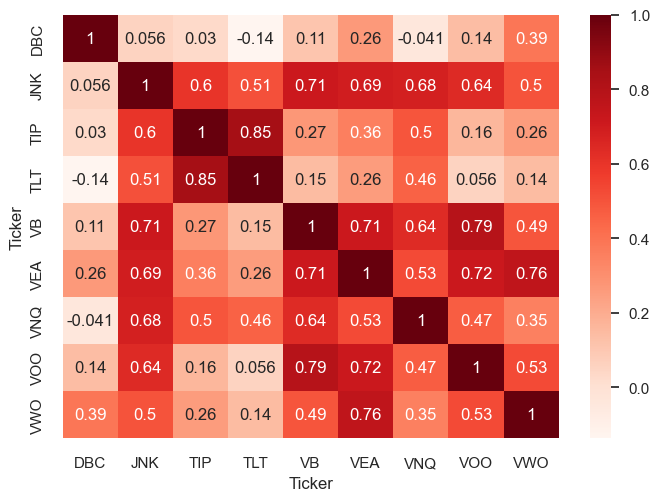

In [6]:
import seaborn as sns
plt.figure()
sns.set()
sns.heatmap(ret.corr(), cmap = "Reds", annot = True)